In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



In [4]:
# Load CSV file into DataFrame
pune_EV = pd.read_csv('pune_EV.csv')

In [5]:
pune_EV.head()

,No.,Region,address,latitude,longitude,power,pin
0,1,sus,"84, Pashan - Sus Rd, Pashan, Pune, Maharashtra",18.553462,73.756114,7.4 kW,411021
1,2,Balewadi,"Balewadi, Pune, Maharashtra",18.579631,73.762776,7.4 kW,411045
2,3,Balewadi,"The Orchid Hotel, SHREE SHIV CHHATRAPATI SPORT...",18.570929,73.764921,7.4 kW,411045
3,4,Hinjawaadi,"HPR3+2R5, Highmont Rd, Phase 2, Hinjewadi Raji...",18.592928,73.703307,7.4 kW,411057
4,5,Hinjawaadi,"Opposite Indialand Global Tech Park, Old Yes B...",18.596145,73.724591,7.4 kW,411057


In [6]:
# Extract relevant features for clustering
X = pune_EV[['latitude', 'longitude']].values

In [7]:
# Train K-Means clustering model
kmeans = KMeans(n_clusters=7, random_state=42) # Specify the number of clusters
kmeans.fit(X)
pune_EV['kmeans_labels'] = kmeans.labels_

# Train Gaussian Mixture Model (GMM) clustering model
gmm = GaussianMixture(n_components=7, random_state=42) # Specify the number of components
gmm.fit(X)
pune_EV['gmm_labels'] = gmm.predict(X)

# Train Agglomerative Clustering model
agg = AgglomerativeClustering(n_clusters=7)
agg.fit(X)
pune_EV['agg_labels'] = agg.labels_

# Train DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=10) # Specify the epsilon and min_samples values
dbscan.fit(X)
pune_EV['dbscan_labels'] = dbscan.labels_

c:\Users\Dell\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\Dell\AppData\Local\Temp\ipykernel_15632\2022638554.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['kmeans_labels'].values), cmap='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_15632\2022638554.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0, 1].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['gmm_labels'].values), cmap='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_15632\2022638554.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['agg_labels'].values), cmap='viridis')


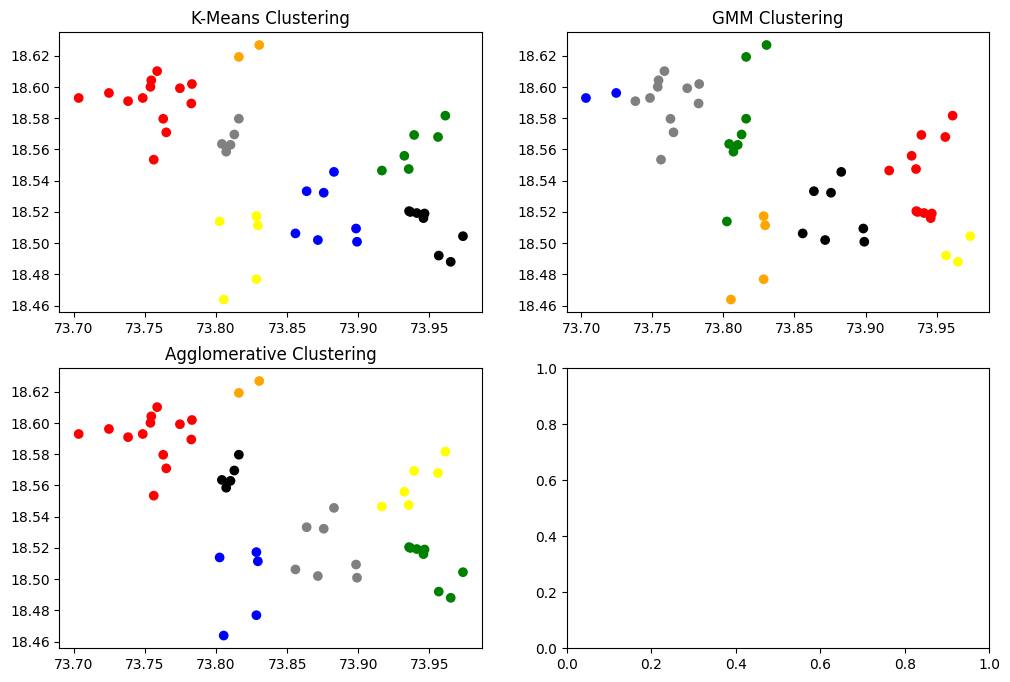

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Define custom colors for clusters
colors = ['red', 'green', 'blue', 'black', 'grey', 'yellow', 'orange']  # Specify colors for each cluster label

# Define a function to map labels to colors
map_labels_to_colors = np.vectorize(lambda x: colors[x])

# Visualize the results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['kmeans_labels'].values), cmap='viridis')
axes[0, 0].set_title('K-Means Clustering')
axes[0, 1].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['gmm_labels'].values), cmap='viridis')
axes[0, 1].set_title('GMM Clustering')
axes[1, 0].scatter(X[:, 1], X[:, 0], c=map_labels_to_colors(pune_EV['agg_labels'].values), cmap='viridis')
axes[1, 0].set_title('Agglomerative Clustering')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_silhouette_score = silhouette_score(X, pune_EV['kmeans_labels'])
gmm_silhouette_score = silhouette_score(X, pune_EV['gmm_labels'])
agg_silhouette_score = silhouette_score(X, pune_EV['agg_labels'])

print("K-Means Silhouette Score:", kmeans_silhouette_score)
print("GMM Silhouette Score:", gmm_silhouette_score)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)


K-Means Silhouette Score: 0.5098814565758544
GMM Silhouette Score: 0.38214723432519
Agglomerative Clustering Silhouette Score: 0.5098814565758544


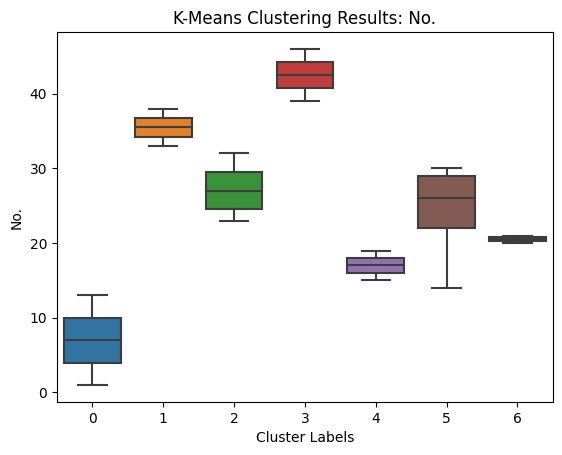

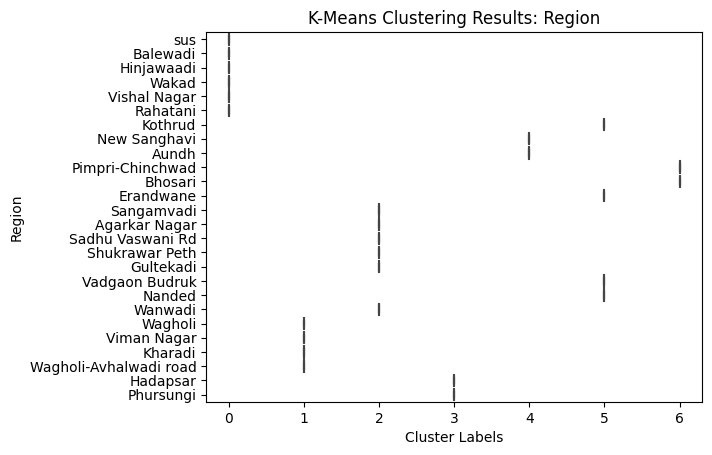

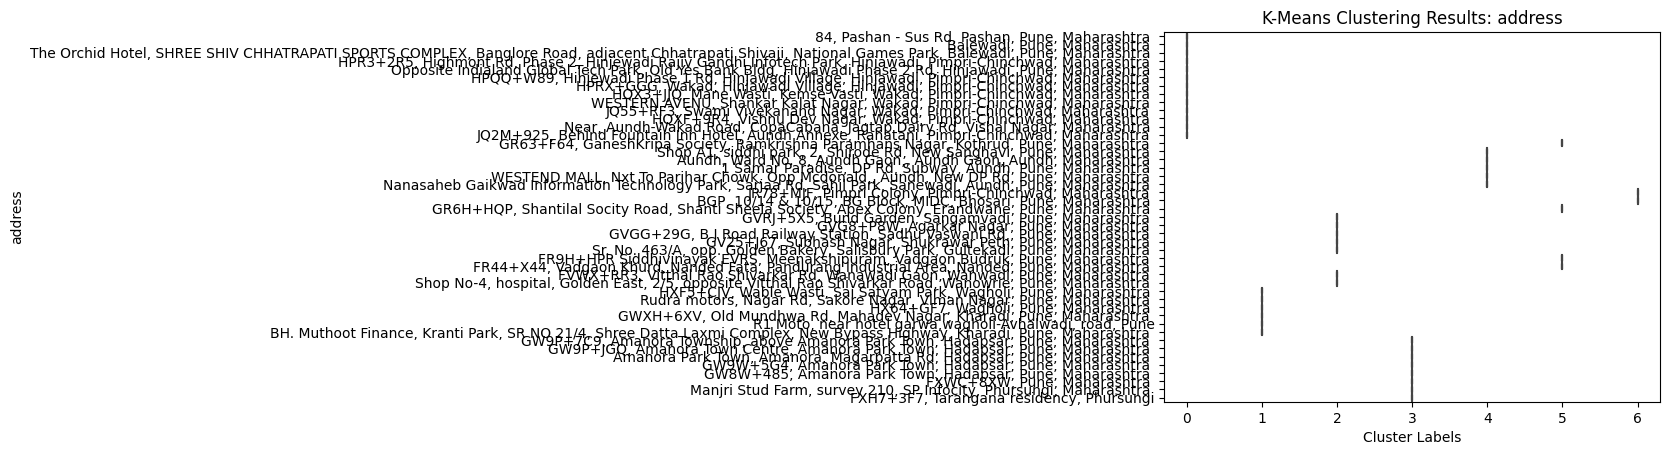

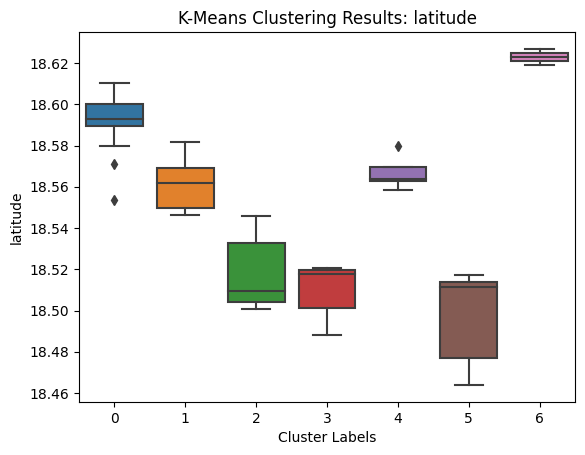

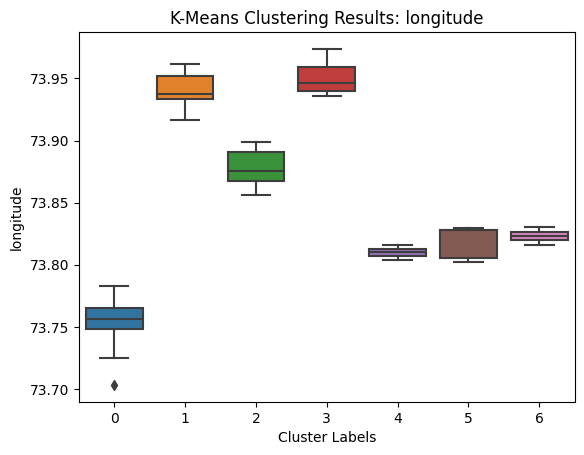

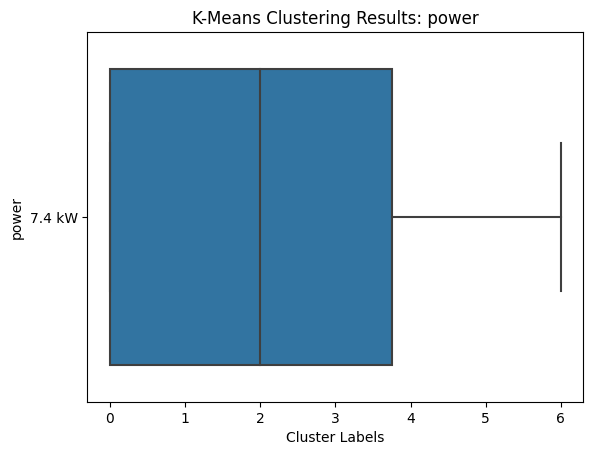

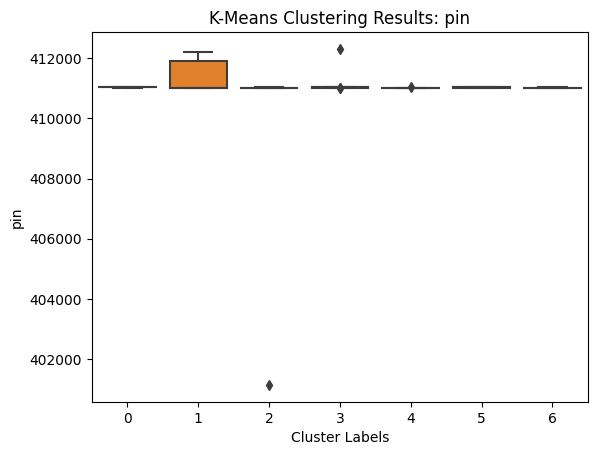

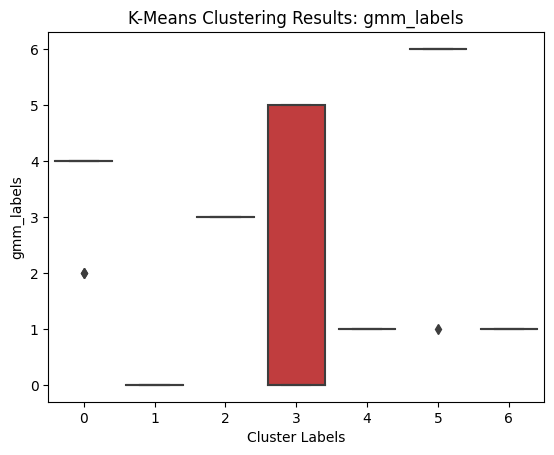

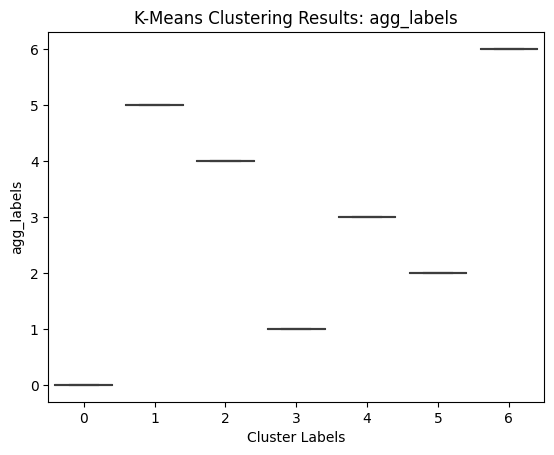

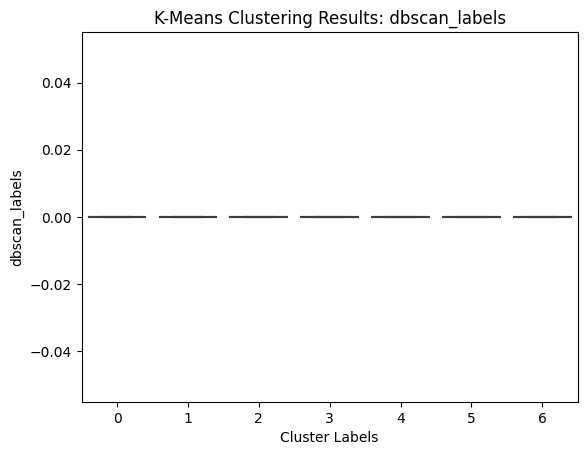

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract cluster labels and attribute values from K-Means clustering
cluster_labels = pune_EV['kmeans_labels']
attribute_values = pune_EV.drop(['kmeans_labels'], axis=1)  # Drop the cluster labels column

# Create box plots for each attribute, grouped by cluster labels
for column in attribute_values.columns:
    sns.boxplot(x=cluster_labels, y=attribute_values[column])
    plt.xlabel('Cluster Labels')
    plt.ylabel(column)
    plt.title(f'K-Means Clustering Results: {column}')
    plt.show()

In [10]:
import requests
import json

# Set the API endpoint and parameters
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'address': 'GW9P+7C9, Amanora Township, above Amanora Park Town, Hadapsar, Pune, Maharashtra',
          'key': 'YOUR_API_KEY'}

# Send the API request and parse the response
response = requests.get(url, params=params)
data = json.loads(response.text)

# Check if the 'results' list is not empty
if data['results']:
    # Extract the latitude and longitude values
    lat = data['results'][0]['geometry']['location']['lat']
    lng = data['results'][0]['geometry']['location']['lng']

    print("Latitude: ", lat)
    print("Longitude: ", lng)
else:
    print("No results found for the address.")

No results found for the address.


In [11]:
# Take input of latitude and longitude
latitude = input() #18.5204  # Enter value from 18.46 to 18.62
longitude = input()#73.8567  # Enter value from 73.70 to 73.97

# Create a new data point with the input latitude and longitude
new_data = np.array([[latitude, longitude]])

# Predict the cluster label for the new data point using the trained K-Means model
predicted_label = kmeans.predict(new_data)

# Print the predicted cluster label
print("Predicted Cluster Label:", predicted_label[0])

ValueError: could not convert string to float: ''

In [ ]:
# Extract the addresses in the predicted cluster
predicted_cluster_label = predicted_label[0]
addresses_in_predicted_cluster = pune_EV[pune_EV['kmeans_labels'] == predicted_cluster_label]['address']

# Print the addresses in the predicted cluster
print("Addresses in Predicted Cluster:")
for address in addresses_in_predicted_cluster:
    print(address)


Addresses in Predicted Cluster:
GR63+F64, GaneshKripa Society, Ramkrishna Paramhans Nagar, Kothrud, Pune, Maharashtra 
GR6H+HQP, Shantilal Socity Road, Shanti Sheela Society, Apex Colony, Erandwane, Pune, Maharashtra 
GR6H+HQP, Shantilal Socity Road, Shanti Sheela Society, Apex Colony, Erandwane, Pune, Maharashtra 
FR9H+HPR Siddhivinayak EVRS, Meenakshipuram, Vadgaon Budruk, Pune, Maharashtra 
FR44+X44, Vadgaon Khurd, Nanded Fata, Pandurang Industrial Area, Nanded, Pune, Maharashtra 


In [ ]:
import geopy.distance

# Input latitude and longitude
input_latitude = input() #18.5204 # Enter value from 18.46 to 18.62
input_longitude = input() #73.8567 # Enter value from 73.70 to 73.97

# Calculate distances between input latitude/longitude and all addresses in the dataset
pune_EV['distance'] = pune_EV.apply(lambda row: geopy.distance.distance((input_latitude, input_longitude),
                                                                     (row['latitude'], row['longitude'])).km, axis=1)

# Find the address with the minimum distance
nearest_address = pune_EV.loc[pune_EV['distance'].idxmin(), 'address']

# Print the nearest address
print("Nearest Address:")
print(nearest_address)

Nearest Address:
Rudra motors, Nagar Rd, Sakore Nagar, Viman Nagar, Pune, Maharashtra 
